# Assignment 1

In this assignment, you will explore a dataset. 

You can choose a dataset to follow this assignment from the list of available datasets in https://pytorch.org/vision/stable/datasets.html . Given that you will be asked to extract RGB descriptros, you should select 3-channel images.

Comment your code and indicate what the different instructions are doing and what you are showing and printing. 
When printing figures do not forget about the title, x and y labels. The font size should be matching the text size of the text in your report. 
Do not forget to add legends to the plots. 

In [2]:
# Load needed packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import pingouin as pg
from sklearn.metrics import silhouette_samples
# include packages you will be using

### Exercise: Load data

Load the dataset. 
Print how many samples, classes, and shape of an image. 

In [3]:
import torchvision
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

dataset = torchvision.datasets.cifar.CIFAR10(root="./",transform=ToTensor(), download=True, train=True)

dataloader = DataLoader(dataset, shuffle=True, batch_size=len(dataset))

Files already downloaded and verified


In [4]:
features, labels = next(iter(dataloader))

In [5]:
features = np.array(features)
labels = np.array(labels)

nSamples = features.shape[0]
nClasses = len(np.unique(labels))
imgShape = features[0, :, :, :].shape

print("Number of samples: ", nSamples)
print("Number of classes: ", nClasses)
print("Shape of an image: ", imgShape)

Number of samples:  50000
Number of classes:  10
Shape of an image:  (3, 32, 32)


### Exercise: Quantify dataset

1) Print the number of samples per category.

2) Plot these number using a bar plot.

Reflection: Are you working with a balanced dataset? unbalanced dataset? Are there majoritarian classes? Do you think this will affect the later analysis and training of your models?

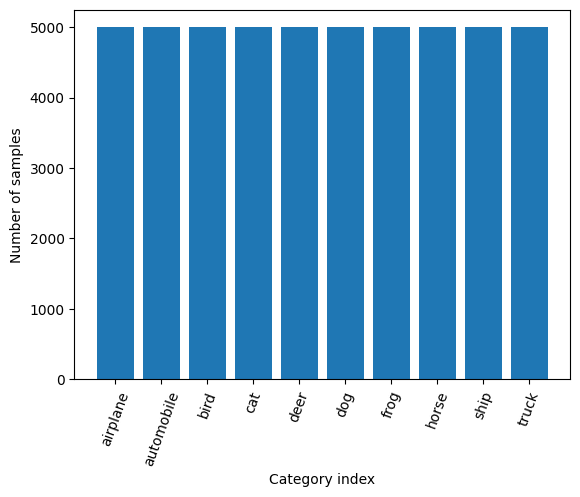

In [6]:
unique, counts = np.unique(labels, return_counts=True)

plt.bar(np.array(dataset.classes)[unique], counts)
plt.ylabel("Number of samples")
plt.xlabel("Category index")
plt.xticks(rotation=70)
plt.show()

### Exercise: Visualize images

Create a figure with n x 4 images, one per category of your dataset. The value of n will depend on the number of categories of your selected dataset.
As the title of each of the images in your figure, indicate the category it belongs to.

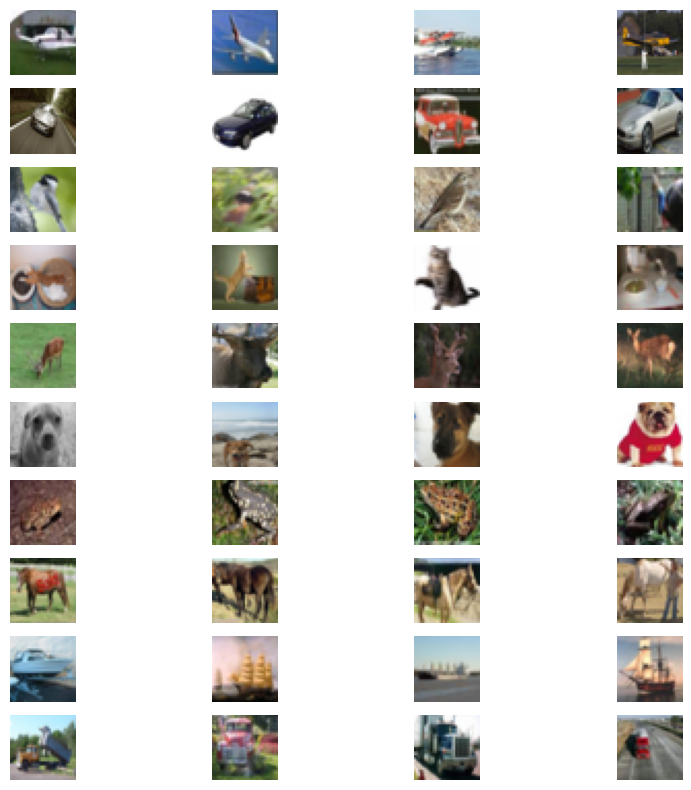

In [7]:
# your code here
fig, axs = plt.subplots(nClasses, 4, figsize=(10, 10))

for n in np.unique(labels):
    for i in range(4):
        img = np.transpose(features[labels == n][i], (1, 2, 0))
        axs[n, i].imshow(img)
        axs[n, i].axis('off')

|### Exercise: RGB feature extraction

Extract RGB values from the image as three lists. 8 values per channel. To do so, you can compute the histogram of each channel with 8 bits, and then concatenate those values. The resulting descriptor will have 24 values (8 values per channel). This feature vector is the descriptor of an images in your dataset.

In [8]:
# your code here
descriptor = np.zeros((nSamples, 24))

for i in range(nSamples):
    img = np.transpose(features[i], (1, 2, 0))

    r = img[:, :, 0].flatten()
    g = img[:, :, 1].flatten()
    b = img[:, :, 2].flatten()

    r_hist, _ = np.histogram(r, bins=8)
    g_hist, _ = np.histogram(g, bins=8)
    b_hist, _ = np.histogram(b, bins=8)

    descriptor[i, :] = np.concatenate((r_hist, g_hist, b_hist))

# descriptor = descriptor.tolist()
# descriptor = [tuple(x) for x in descriptor]

### Exercise: Correlation among samples of the different categories

After extracting the RGB descriptors, you have now descriptors and labels (each category represents a label). 

Compute the inter-class and intra-class variability of your dataset. 

Hints:

- For intra-class correlation you can use the implementation from the pingouin package,
https://pingouin-stats.org/generated/pingouin.intraclass_corr.html

- For inter-class correlation you can compute the variability among the descriptors of the samples that belong to a category.

In [9]:
score = silhouette_samples(descriptor, labels)

In [10]:
type(score)

numpy.ndarray

In [11]:
# your code here

df = pd.DataFrame(np.hstack((descriptor, np.reshape(score, (len(score), 1)), np.reshape(labels, (len(labels), 1)))))

# df = pd.DataFrame({
#     'descriptors': descriptor,
#     'score': score,
#     'y': labels
# })

columns = []

for i in range(24):
    columns.append("x_" + str(i + 1))
columns.append("score")
columns.append("y")
df.columns = columns

# icc = pg.intraclass_corr(df, targets="y", raters="x_1", ratings="score")


NameError: name 'pg' is not defined

In [ ]:
df.head(5)

The Silhouette score is used to assess the performance of using unsupervised machine learning (clustering). We can also use it here to assess the compactness of the extracted descriptors.

You can use the function available in Sklearn;

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [ ]:
# your code here

Reflection: Do these metrics help you assess the degree of similarity among the samples of a category? what about among categories? What can you deduce?

### Exercise: Dimensionality reduction for visualization 

We can visualize 2- or 3-dimensional spaces. 
For this reason, you need to reduce dimensionality. 

In this exercise you are asked to use PCA for reducing dimensionality.

Link to function to apply PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Create the following two figures:

1) Rely on the first 2 principal components to plot the samples of your dataset. 

2) Rely on the first 3 principal components to create a 3D plot.


In [20]:
# your code here
%matplotlib notebook
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
pca3 = PCA(n_components=3)

transformed2 = pca2.fit_transform(descriptor)
transformed3 = pca3.fit_transform(descriptor)

for label in np.arange(10):
    idx = labels == label
    plt.scatter(transformed2[idx, 0], transformed2[idx, 1])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')


for label in np.arange(10):
    idx = labels == label
    ax.scatter(transformed3[idx, 0], transformed3[idx, 1], transformed3[idx, 2])

plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
features[0].shape

### Exercise: Reflection

Reflect on the following questions. Your answers can be implemented in the report for the practical.

    - Will you obtain the same visualisation in the feature space for diffrent extracted features?
    
    - Are the classes distinguishable on the feature space when relaying on PCA over RGB?
    
    - What other visualization could you include to better describe your data?

In [ ]:
# your reflection here

### [Optional] Exercise: Repeat experiments with different image descriptros

e.g. 
- Harris Corner Detection

- Shi-Tomasi Corner Detector and Good Features to Track

- Scale-Invariant Feature Transform (SIFT)

- Speeded-up robust features (SURF)

- Features from Accelerated Segment Test (FAST)

- Blob Detectors With LoG, DoG, and DoH

If you have OpenCV installed you can follow this examples,
https://automaticaddison.com/image-feature-detection-description-and-matching-in-opencv/

When using Scikit-image,
https://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=hog